In [202]:
import pandas as pd 
from pandas.api.types import CategoricalDtype

import numpy as np 
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt


import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [203]:
house_data = pd.read_csv('data/kc_house_data.csv')

test_data = house_data[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
                        'condition','grade', 'yr_built', 'zipcode', 'view', 'price'
                       ]].copy()

# Drop duplicates 
test_data.drop_duplicates(subset= 'id', keep='first', inplace=True, ignore_index = True)

# bedrooms drop all greater than 6
test_data.drop(test_data.index[test_data['bedrooms'] >= 7], inplace = True) # ---- UNDO

#bathrooms remove all nulls
test_data['bathrooms'] = test_data['bathrooms'].dropna()

# Price drop outliers 
test_data['price'] = test_data['price'].map(lambda x: np.log(x)) 

# Waterfront drop nulls 
house_data = house_data[house_data['waterfront'].notna()]

# View dropna
test_data = test_data[test_data['view'].notna()]

# grade drop single low value
test_data = test_data[test_data['grade'] != '3 Poor']
# **************************************************************************************
# ABOVE IS GOOD 

In [204]:
# Map values 0-1 to ordinal categorical
test_data.condition.replace({'Poor':0.2, 'Fair': 0.4, 'Average':0.6, 'Good':0.8, 'Very Good': 1.0}, inplace = True)

test_data.grade.replace({'4 Low': 0.1, '5 Fair':0.2, '6 Low Average':0.3, '7 Average':0.4,'8 Good':0.5,
                 '9 Better':0.6, '10 Very Good':0.7, '11 Excellent':0.8,'12 Luxury':0.9, 
                 '13 Mansion':1.0}, inplace = True)

In [205]:
ord_cat_selector = ['view'] # ----for testin
cat_subset = test_data[ord_cat_selector]
ordered_view = ['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT']
o_enc = OrdinalEncoder(categories = [ordered_view]) # --- original
o_enc.fit(cat_subset)
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                       columns = cat_subset.columns)

In [206]:
# Predict price
nom_features = ['bathrooms','price', 'sqft_living'] # ---TEST



dum_zipcode = pd.get_dummies(test_data['zipcode'], prefix = 'zip', drop_first = True)
dum_year = pd.get_dummies(test_data['yr_built'], prefix = 'year', drop_first = True)

X_p = pd.concat([test_data[nom_features], X_subset, dum_year, dum_zipcode],join = 'inner', axis = 1) 


X = X_p.drop(columns = 'price')
y = X_p['price']

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size=0.3)

In [207]:
# Fit price print values R Score =  0.831
lr_p = LinearRegression()
lr_p.fit(X_train_p, y_train_p)
y_pred_p = lr_p.predict(X_test_p)
R_p = lr_p.score(X_train_p, y_train_p)
MAE_p = mean_absolute_error(y_pred_p, y_test_p)
RMSE_p = np.sqrt(mean_squared_error(y_pred_p, y_test_p))
print('Price Prediction:' '\n' 'R Score = ', R_p, '\n' 'MAE = ', MAE_p, '\n' 'RMSE = ', RMSE_p, '\n' 'First five predicted values : ', y_pred_p[0:5])

Price Prediction:
R Score =  0.8325941992520969 
MAE =  0.15876996893467876 
RMSE =  0.2209233199380271 
First five predicted values :  [13.06272539 13.26015237 12.29029966 13.23047585 13.72615493]


In [192]:
# Predict grade
nom_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors',
                 'price', 'grade'] #test--- R Score =  0.757

dum_zipcode = pd.get_dummies(test_data['zipcode'], prefix = 'zip', drop_first = True)
dum_year = pd.get_dummies(test_data['yr_built'], prefix = 'year', drop_first = True)
X_ = pd.concat([test_data[nom_features], X_subset, dum_year, dum_zipcode],join = 'inner', axis = 1) #-- original

X = X_.drop(columns = 'grade')
y = X_['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [193]:
# Fit grade print Values R Score =  0.749
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
R = lr.score(X_train, y_train)
MAE = mean_absolute_error(y_pred, y_test)
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
COEF = lr.coef_
print('Grade Prediction:' '\n' 'R Score = ', R, '\n' 'MAE = ', MAE, '\n' 'RMSE = ', RMSE, '\n' 
      'First five predicted values : ', y_pred[0:5])

Grade Prediction:
R Score =  0.7524529680456415 
MAE =  0.0462750879627782 
RMSE =  0.05925595732058518 
First five predicted values :  [0.47399462 0.41549874 0.56213485 0.68533255 0.54014171]


# ABOVE IS GOOD.....ish -------------------------------------------------------

In [173]:
# for value in X_test_p.index y_test_p
# for value in X_test.index 

# append together kind of like an inner join 
# this will allow us to have indexes of the x features used on price and indexs of features used on grade

# this will lead us to indexes used for y test 
# plot and compare y test and y predict 

# BOTH Y HAVE SAME LENGTH...OBVIOUSLY 

# X_test_p # --- has same index as y_test_p -- used to correlate with y_pred_p and y_test_p
# print(y_test_p,       # --- has values to be plotted, has index correlating index with X_test_p
# y_pred_p)       # --- is based on X_test --- will output what should be the same as y_test_p

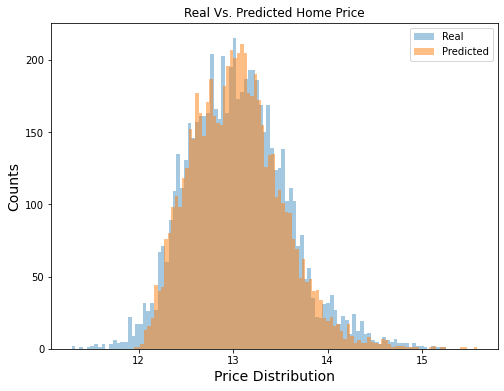

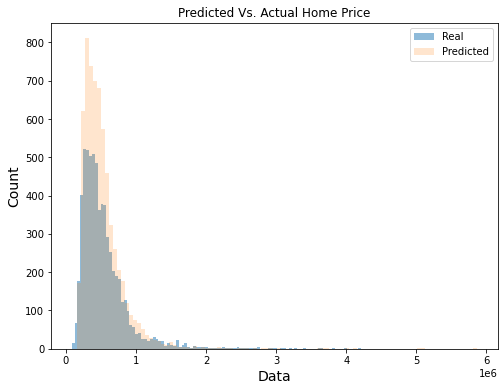

In [199]:
plt.figure(figsize=(8,6))
plt.hist(y_test_p, bins=100, alpha=0.4, label="Real")
plt.hist(y_pred_p, bins=100, alpha=0.5, label="Predicted")
plt.xlabel("Price Distribution", size=14)
plt.ylabel("Counts", size=14)
plt.title("Real Vs. Predicted Home Price")
plt.legend(loc='upper right');

plt.figure(figsize=(8,6))
plt.hist(np.exp(y_test_p), bins=100, alpha=0.5, label="Real")
plt.hist(np.exp(y_pred_p), bins=100, alpha=0.2, label="Predicted")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Predicted Vs. Actual Home Price")
plt.legend(loc='upper right');

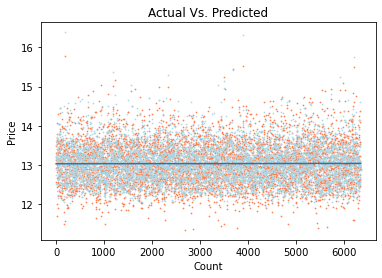

In [184]:
# x = 
# plt.figure(figsize=(8,6))
# # plt.hist(y_test_p, bins=100, alpha=0.2, label="Real")
# # plt.hist(y_pred_p, bins=100, alpha=0.2, label="Predicted")
# plt.scatter(y_test_p, y_pred_p, c = 'red', 'blue')
# plt.xlabel("Real", size=14)
# plt.ylabel("Predicted", size=14)
# plt.title("Predicted Vs. Actual")
# plt.legend(loc='upper right')
# m, b = np.polyfit(x, y, 1)
# plt.plot(x, m*x + b)

# y_pred_p = pd.Series(y_pred_p)
# x_vari = pd.Series(range(6351))
# combi = pd.DataFrame(x_vari, y_test_p, y_pred_p)
# sns.scatterplot(y_test_p, y_pred_p)



x_vari = np.array(range(6351))

plt.scatter(x_vari, y_test_p, s = 0.5, c='coral')
m, b = np.polyfit(x_vari, y_test_p, 1)
plt.plot(x_vari, m*x_vari + b)

plt.scatter(x_vari, y_pred_p, s = 0.5, c='lightblue')

plt.title('Actual Vs. Predicted')
plt.xlabel('Count')
plt.ylabel('Price')
plt.show()

# x_vari = np.array(range(6351))

# plt.scatter(x_vari, np.exp(y_test_p), s = 1, c='coral')
# m, b = np.polyfit(x_vari, np.exp(y_test_p), 1)
# plt.plot(x_vari, m*x_vari + b)

# plt.scatter(x_vari, np.exp(y_pred_p), s = 1, c='lightblue')

# plt.title('Actual Vs. Predicted')
# plt.xlabel('Count')
# plt.ylabel('Price')
# plt.show()

# plt.scatter(y_test_p, y_pred_p, s = 5)
# m, b = np.polyfit(y_test_p, y_pred_p, 1)
# plt.plot(x_vari, m*x_vari + b)
# plt.show();
